In [4]:
import redframes as rf
import pandas as pd
import matplotlib.pyplot as plt

pdf = pd.DataFrame([
    [12, "D'Marcus", "Williums", "East", "WR", 253.21],
    [14, "T.J.", "Juckson", "East", "WR", 239.99],
    [67, "T'Variuness", "King", "East", "WR", 173.46],
    [88, "Tyroil", "Smoochie-Wallace", "East", "QB", 367.15],
    [91, "D'Squarius", "Green, Jr.", "East", "TE", None],
    [3, "Ibrahim", "Moizoos", "East", "TE", 134.21],
    [13, "Jackmerius", "Tacktheratrix", "East", "RB", 228.42],
    [55, "D'Isiah T.", "Billings-Clyde", "East", "WR", 100],
    [0, "D'Jasper", "Probincrux III", "East", "RB", 180.14],
    [1, "Leoz Maxwell", "Jilliumz", "East", None, 170.21],
    [68, "Javaris Jamar", "Javarison-Lamar", "East", "WR", 87.29],
    [69, "Davoin", "Shower-Handel", None, "TE", 99.76],
    [77, "Hingle", "McCringleberry", None, "RB", 132.63],
    [89, "L'Carpetron", "Dookmarriot", "East", "QB", 240.5],
    [20, "J'Dinkalage", "Morgoone", "East", "K", 118.12],
    [17, "Xmus Jaxon", "Flaxon-Waxon", "East", "QB", 211.07],
    [10, "Saggitariutt", "Jefferspin", "West", "QB", 355.8],
    [11, "D'Glester", "Hardunkichud", "West", "WR", 305.45],
    [91, "Swirvithan", "L'Goodling-Splatt", "West", "WR", 147.47],
    [44, "Quatro", "Quatro", "West", "WR", 98.29],
    [19, "Ozamataz", "Buckshank", "West", "RB", 85.58],
    [12, "Beezer Twelve", "Washingbeard", "West", "RB", None],
    [55, "Shakiraquan T.G.I.F.", "Carter", "West", "TE", 148.33],
    [70, "X-Wing", "@Aliciousness", "West", "RB", 12.00],
    [36, "Sequester", "Grundelplith M.D.", "West", "WR", 228.26],
    [4, "Scoish Velociraptor", "Maloish", "West", "TE", None],
    [5, "T.J. A.J. R.J.", "Backslashinfourth V", "West", "RB", 183.12],
    [33, "Eeee", "Eeeeeeeee", "West", "QB/RB", 200.01],
    [88, "Donkey", "Teeth", "West", "TE", 56.2],
    [88, "Donkey", "Teeth", "West", "TE", 56.2],
    [88, "Donkey", "Teeth", "West", "TE", 56.2],
    [15, "Torque (Construction Drilling Noise)", "Lewith", None, "K", 153.70],
    [6, "(The Player", "Formerly Known As Mousecop)", None, "K", 121.65],
    [2, "Dan", "Smith", "West", "QB", 367.69]
], columns=["Number", "First Name", "Last Name", "Team", "Position", "Points"])

rdf = rf.wrap(pdf)

In [14]:
df = (
    rdf
    .rename({"Position": "position"})
    .filter(lambda row: row["position"] != "QB/RB")
    .group("position")
    .take(3)
    .group("position")
    .summarize({"avp": ("Points", rf.stat.mean)})
    .sort("avp")
    .mutate({"color": lambda row: row["position"] in ["WR", "RB"]})
    .replace({"color": {False: "orange", True: "red"}})
)

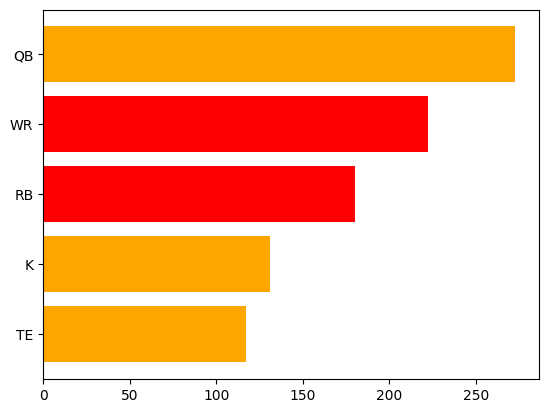

In [15]:
plt.barh(df["position"], df["avp"], color=df["color"]);